__K-Nearest Neighbour__ Syntax :

``retval, results, neighborResponses, dist = cv2.ml_KNearest.findNearest(samples, k[, results], neighborResponses[,dist])``

- ``samples`` is the input samples stores by rows
- ``k`` number of nearest neighbor
- ``results`` store the predictions for each input sample
- ``neighborResponses`` stores the corresponding neighbor
- ``dist`` stores the distance from the input samples to the corresponding neighbors

In [168]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [169]:
#Data is composed of 16 points 
data = np.random.randint(0, 100, (16, 2)).astype(np.float32)

#Creating the label (0:RED, 1:BLUE) for each of the 16 points
labels = np.random.randint(0, 2, (16, 1)).astype(np.float32)

#creating the sample points to be classified
sample = np.random.randint(0, 100, (1, 2)).astype(np.float32)

In [170]:
#Intantiating K-NN
knn = cv2.ml.KNearest_create()

In [171]:
#Training K-NN
knn.train(data, cv2.ml.ROW_SAMPLE, labels)

#K-NN find Nearest
k = 3
ret, results, neighbours, dist = knn.findNearest(sample, k)

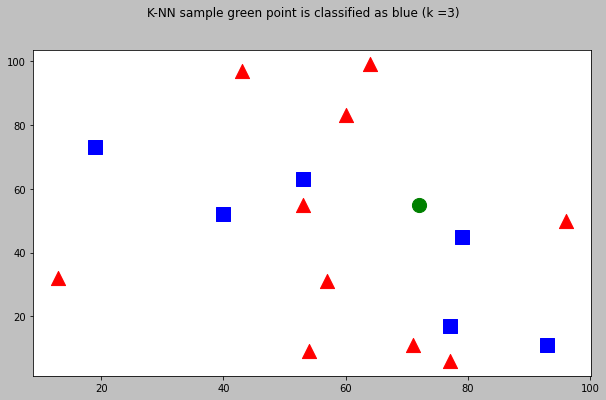

In [172]:
fig = plt.figure(figsize=(10, 6))
plt.rcParams['figure.facecolor'] = 'silver'


#take points with label 0 (will be the red triangle) and plot them:
red_triangle = data[labels.ravel() == 0]
plt.scatter(red_triangle[:, 0], red_triangle[:, 1], 200, 'r','^')


#take points with label 1 (will be BLUE squares) and plot them
blue_square = data[labels.ravel() ==1]
plt.scatter(blue_square[:, 0], blue_square[:, 1], 200, 'b', 's')

#plt the sample points
plt.scatter(sample[:, 0], sample[:, 1], 200, 'g','o')

#setting the title

if results[0][0] >0:
    plt.suptitle("K-NN sample green point is classified as blue (k =" + str(k) +")")
else:
    plt.suptitle("K-NN sample green point is classified as RED (k =" + str(k) +")")

In [173]:
print("Result: {}".format(results))
print("Neighbours: {}".format(neighbours))
print("Distance: {}".format(dist))

Result: [[1.]]
Neighbours: [[1. 0. 1.]]
Distance: [[149. 361. 425.]]


-----------------------

__HANDWRITTEN DIGITS RECOGNITION__ with __K-NN__

In [174]:
#constant
SIZE_IMAGE = 20
NUM_CLASSES = 10

In [175]:
def load_digits_and_labels(big_image):
    """Returns all the digits from the 'big' image and creates the corresponding labels for each image"""

    # Load the 'big' image containing all the digits:
    digits_img = cv2.imread(big_image, 0)

    # Get all the digit images from the 'big' image:
    number_rows = digits_img.shape[1] // SIZE_IMAGE
    rows = np.vsplit(digits_img, digits_img.shape[0] // SIZE_IMAGE)

    digits = []
    for row in rows:
        row_cells = np.hsplit(row, number_rows)
        for digit in row_cells:
            digits.append(digit)
    digits = np.array(digits)

    # Create the labels for each image:
    labels = np.repeat(np.arange(NUM_CLASSES), len(digits) / NUM_CLASSES)
    return digits, labels

In [176]:
def get_accuracy(predictions, labels):
    """Returns the accuracy based on the coincidences between predictions and labels """

    accuracy = (np.squeeze(predictions) == labels).mean()
    return accuracy * 100

In [177]:
def raw_pixels(img):
    """Returns raw pixels as feature from the image """

    return img.flatten()

In [178]:
#Load all the digits and the corresponding labels
digits, labels = load_digits_and_labels('images/digits.png')

In [179]:
#Shuffle data
# Constructs a random number generator:
rand = np.random.RandomState(1234)
# Randomly permute the sequence:
shuffle = rand.permutation(len(digits))
digits, labels = digits[shuffle], labels[shuffle]

In [180]:
# Compute the descriptors for all the images.
# In this case, the raw pixels are the feature descriptors
raw_descriptors = []
for img in digits:
    raw_descriptors.append(np.float32(raw_pixels(img)))
raw_descriptors = np.squeeze(raw_descriptors)

# At this point we split the data into training and testing (50% for each one):
partition = int(0.5 * len(raw_descriptors))
raw_descriptors_train, raw_descriptors_test = np.split(raw_descriptors, [partition])
labels_train, labels_test = np.split(labels, [partition])

In [181]:
# Train the KNN model:
print('Training KNN model - raw pixels as features')
knn = cv2.ml.KNearest_create()
knn.train(raw_descriptors_train, cv2.ml.ROW_SAMPLE, labels_train)

# Test the created model:
k = 5
ret, result, neighbours, dist = knn.findNearest(raw_descriptors_test, k)

# Compute the accuracy:
acc = get_accuracy(result, labels_test)
print("Accuracy: {}".format(acc))

Training KNN model - raw pixels as features


Accuracy: 92.60000000000001
